# Activation Functions and Normalization

Activation functions and normalization layers are critical components that enable deep neural networks to learn complex patterns and train stably.

In this tutorial, you will learn:

- 🎯 **Activation Functions** - ReLU, GELU, Sigmoid, Tanh and variants
- 📊 **Batch Normalization** - Stabilizing training with BatchNorm
- 📐 **Layer Normalization** - Alternative normalization for sequences
- 🔲 **Group Normalization** - For small batch sizes
- ⚖️ **When to use each** - Practical guidelines

## Why Are These Important?

**Activation Functions** introduce non-linearity, allowing networks to learn complex patterns  
**Normalization Layers** stabilize training, accelerate convergence, and act as regularizers

In [1]:
import brainstate
import jax.numpy as jnp
import matplotlib.pyplot as plt
import numpy as np

## 1. Activation Functions

Activation functions determine the output of a neuron given its input.

### ReLU Family

#### Standard ReLU

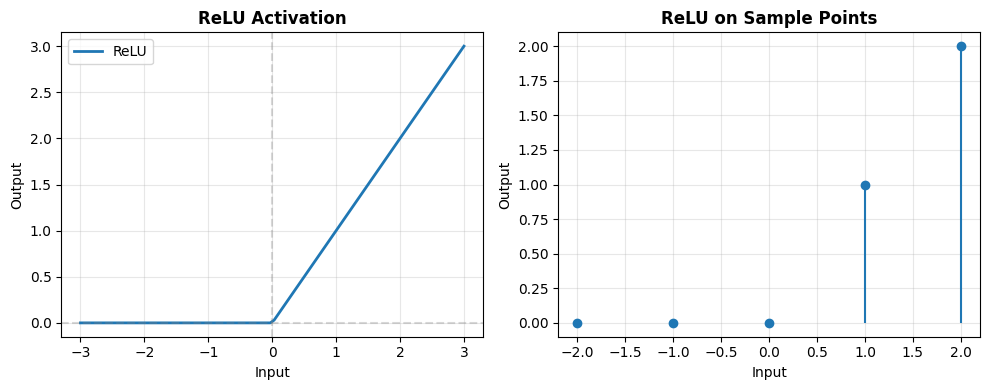

Input:  [-2 -1  0  1  2]
Output: [0 0 0 1 2]

✅ Advantages: Simple, fast, no gradient vanishing for positive values
⚠️  Issue: 'Dying ReLU' problem when neurons always output 0


In [2]:
# ReLU: max(0, x)
relu = brainstate.nn.ReLU()

x = jnp.linspace(-3, 3, 100)
y = relu(x)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(x, y, linewidth=2, label='ReLU')
plt.axhline(0, color='gray', linestyle='--', alpha=0.3)
plt.axvline(0, color='gray', linestyle='--', alpha=0.3)
plt.grid(alpha=0.3)
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('ReLU Activation', fontweight='bold')
plt.legend()

# Test with data
test_input = jnp.array([-2, -1, 0, 1, 2])
test_output = relu(test_input)
plt.subplot(1, 2, 2)
plt.stem(test_input, test_output, basefmt=' ')
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('ReLU on Sample Points', fontweight='bold')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Input:  {test_input}")
print(f"Output: {test_output}")
print("\n✅ Advantages: Simple, fast, no gradient vanishing for positive values")
print("⚠️  Issue: 'Dying ReLU' problem when neurons always output 0")

#### Leaky ReLU

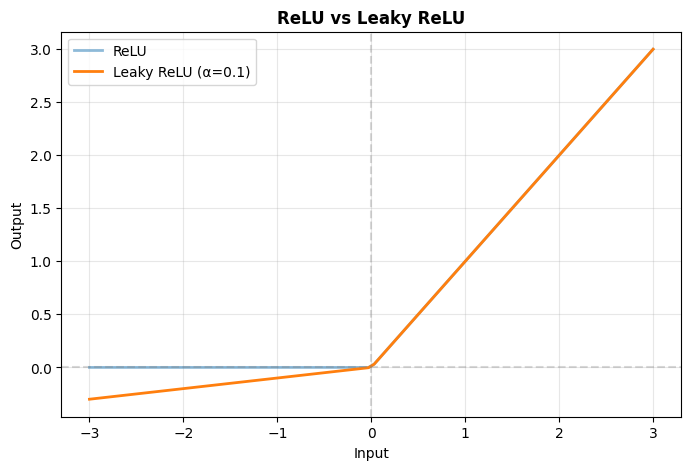

✅ Advantage: Allows small gradient for negative values
   Helps prevent dying ReLU problem


In [3]:
# LeakyReLU: max(alpha * x, x)
leaky_relu = brainstate.nn.LeakyReLU(negative_slope=0.1)

y_leaky = leaky_relu(x)

plt.figure(figsize=(8, 5))
plt.plot(x, y, linewidth=2, label='ReLU', alpha=0.5)
plt.plot(x, y_leaky, linewidth=2, label='Leaky ReLU (α=0.1)')
plt.axhline(0, color='gray', linestyle='--', alpha=0.3)
plt.axvline(0, color='gray', linestyle='--', alpha=0.3)
plt.grid(alpha=0.3)
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('ReLU vs Leaky ReLU', fontweight='bold')
plt.legend()
plt.show()

print("✅ Advantage: Allows small gradient for negative values")
print("   Helps prevent dying ReLU problem")

### Modern Activation Functions

#### GELU (Gaussian Error Linear Unit)

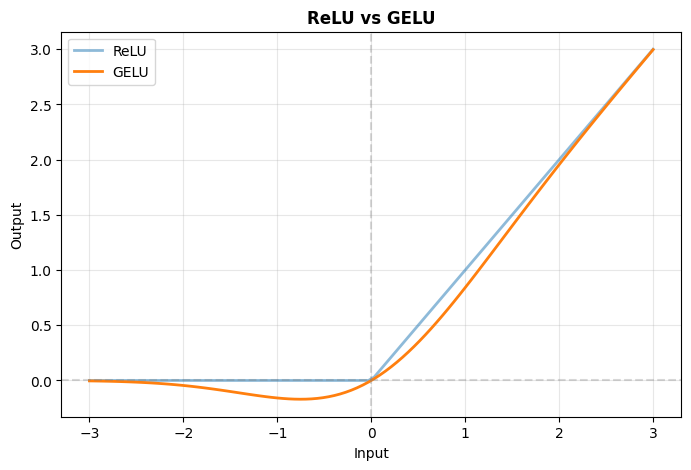

✅ Used in Transformers (BERT, GPT)
✅ Smooth, differentiable everywhere
✅ Stochastic regularization properties


In [4]:
# GELU: Smooth, probabilistic activation
gelu = brainstate.nn.GELU()

y_gelu = gelu(x)

plt.figure(figsize=(8, 5))
plt.plot(x, y, linewidth=2, label='ReLU', alpha=0.5)
plt.plot(x, y_gelu, linewidth=2, label='GELU')
plt.axhline(0, color='gray', linestyle='--', alpha=0.3)
plt.axvline(0, color='gray', linestyle='--', alpha=0.3)
plt.grid(alpha=0.3)
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('ReLU vs GELU', fontweight='bold')
plt.legend()
plt.show()

print("✅ Used in Transformers (BERT, GPT)")
print("✅ Smooth, differentiable everywhere")
print("✅ Stochastic regularization properties")

### Classic Activations

#### Sigmoid and Tanh

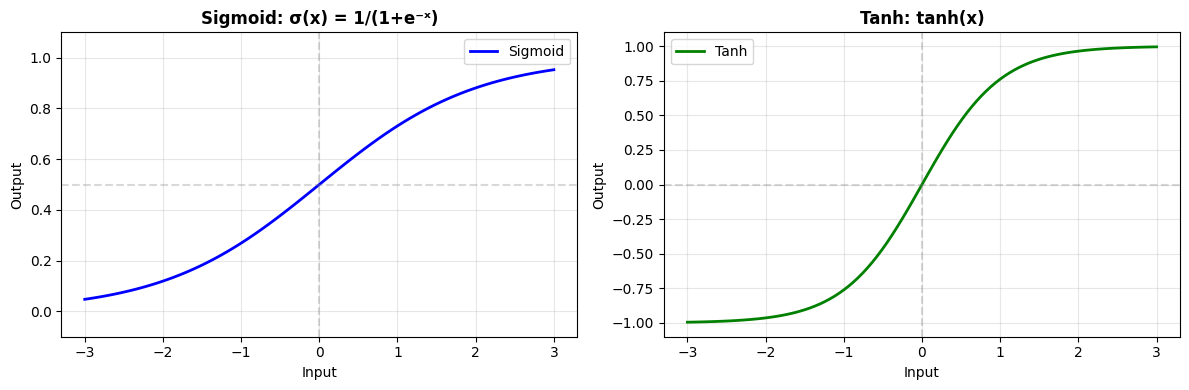

Sigmoid:
  ✅ Output range: (0, 1) - good for probabilities
  ⚠️  Vanishing gradients for large |x|

Tanh:
  ✅ Output range: (-1, 1) - zero-centered
  ⚠️  Also suffers from vanishing gradients
  📝 Often used in RNN/LSTM gates


In [5]:
# Sigmoid: 1 / (1 + exp(-x))
sigmoid = brainstate.nn.Sigmoid()

# Tanh: (exp(x) - exp(-x)) / (exp(x) + exp(-x))
tanh = brainstate.nn.Tanh()

y_sigmoid = sigmoid(x)
y_tanh = tanh(x)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(x, y_sigmoid, linewidth=2, label='Sigmoid', color='blue')
plt.axhline(0.5, color='gray', linestyle='--', alpha=0.3)
plt.axvline(0, color='gray', linestyle='--', alpha=0.3)
plt.grid(alpha=0.3)
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Sigmoid: σ(x) = 1/(1+e⁻ˣ)', fontweight='bold')
plt.legend()
plt.ylim([-0.1, 1.1])

plt.subplot(1, 2, 2)
plt.plot(x, y_tanh, linewidth=2, label='Tanh', color='green')
plt.axhline(0, color='gray', linestyle='--', alpha=0.3)
plt.axvline(0, color='gray', linestyle='--', alpha=0.3)
plt.grid(alpha=0.3)
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Tanh: tanh(x)', fontweight='bold')
plt.legend()
plt.ylim([-1.1, 1.1])

plt.tight_layout()
plt.show()

print("Sigmoid:")
print("  ✅ Output range: (0, 1) - good for probabilities")
print("  ⚠️  Vanishing gradients for large |x|")
print("\nTanh:")
print("  ✅ Output range: (-1, 1) - zero-centered")
print("  ⚠️  Also suffers from vanishing gradients")
print("  📝 Often used in RNN/LSTM gates")

### Comparing All Activations

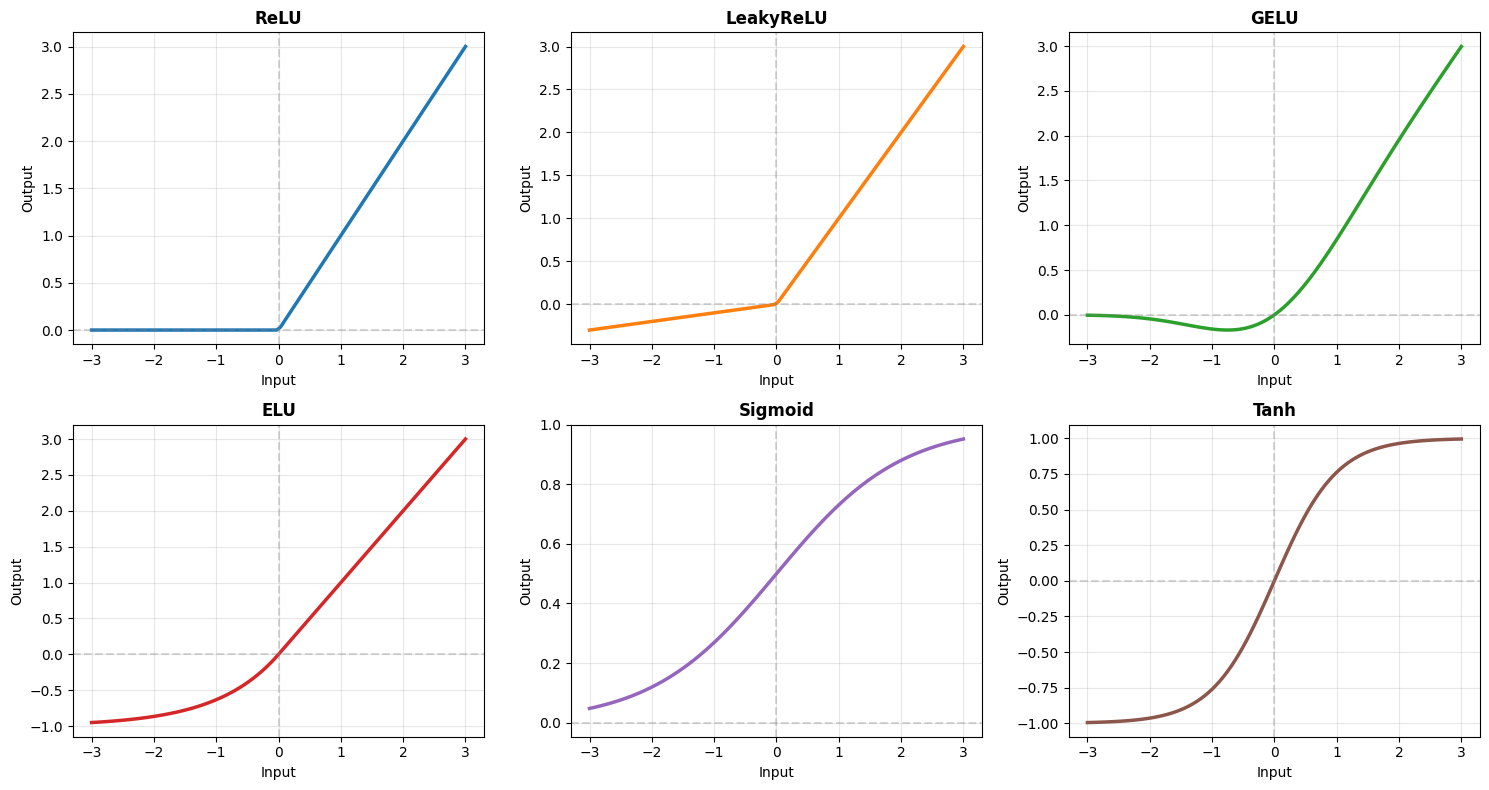


📊 Activation Function Guide:

ReLU:        Default choice, fast, works well in most cases
LeakyReLU:   When dying ReLU is a problem
GELU:        Transformers, NLP models
ELU:         Smooth variant of ReLU with negative values
Sigmoid:     Output layer for binary classification
Tanh:        RNN/LSTM gates, when zero-centered output needed


In [6]:
# Compare multiple activations
activations = {
    'ReLU': brainstate.nn.ReLU(),
    'LeakyReLU': brainstate.nn.LeakyReLU(0.1),
    'GELU': brainstate.nn.GELU(),
    'ELU': brainstate.nn.ELU(),
    'Sigmoid': brainstate.nn.Sigmoid(),
    'Tanh': brainstate.nn.Tanh(),
}

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for idx, (name, activation) in enumerate(activations.items()):
    y_act = activation(x)
    axes[idx].plot(x, y_act, linewidth=2.5, color=f'C{idx}')
    axes[idx].axhline(0, color='gray', linestyle='--', alpha=0.3)
    axes[idx].axvline(0, color='gray', linestyle='--', alpha=0.3)
    axes[idx].grid(alpha=0.3)
    axes[idx].set_xlabel('Input', fontsize=10)
    axes[idx].set_ylabel('Output', fontsize=10)
    axes[idx].set_title(name, fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n📊 Activation Function Guide:\n")
print("ReLU:        Default choice, fast, works well in most cases")
print("LeakyReLU:   When dying ReLU is a problem")
print("GELU:        Transformers, NLP models")
print("ELU:         Smooth variant of ReLU with negative values")
print("Sigmoid:     Output layer for binary classification")
print("Tanh:        RNN/LSTM gates, when zero-centered output needed")

### Softmax - For Classification

Logits:        [2.  1.  0.5 3.  0.1]
Probabilities: [0.22427258 0.08250527 0.05004197 0.60963607 0.03354414]
Sum of probs:  1.000000 (should be 1.0)


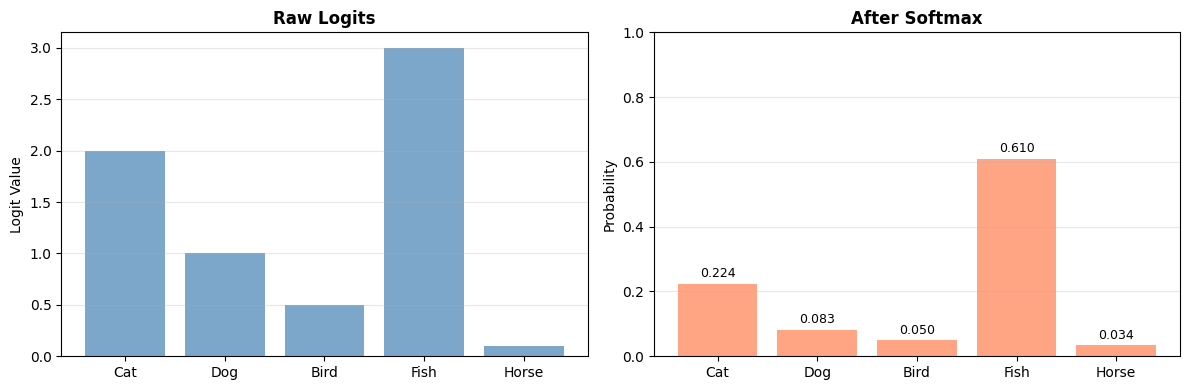


✅ Softmax converts logits to valid probability distribution
   Use for multi-class classification output layer


In [7]:
# Softmax: converts logits to probabilities
softmax = brainstate.nn.Softmax()

# Example logits from a classifier
logits = jnp.array([2.0, 1.0, 0.5, 3.0, 0.1])
probs = softmax(logits)

print("Logits:       ", logits)
print("Probabilities:", probs)
print(f"Sum of probs:  {jnp.sum(probs):.6f} (should be 1.0)")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

classes = ['Cat', 'Dog', 'Bird', 'Fish', 'Horse']

axes[0].bar(classes, logits, color='steelblue', alpha=0.7)
axes[0].set_ylabel('Logit Value')
axes[0].set_title('Raw Logits', fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

axes[1].bar(classes, probs, color='coral', alpha=0.7)
axes[1].set_ylabel('Probability')
axes[1].set_title('After Softmax', fontweight='bold')
axes[1].set_ylim([0, 1])
axes[1].grid(axis='y', alpha=0.3)

# Add values on bars
for i, v in enumerate(probs):
    axes[1].text(i, v + 0.02, f'{v:.3f}', ha='center', fontsize=9)

plt.tight_layout()
plt.show()

print("\n✅ Softmax converts logits to valid probability distribution")
print("   Use for multi-class classification output layer")

## 2. Normalization Layers

Normalization stabilizes training by controlling the distribution of activations.

### Batch Normalization

In [8]:
# BatchNorm: Normalizes across batch dimension
brainstate.random.seed(42)
batch_norm = brainstate.nn.BatchNorm0d((10,))

print("BatchNorm0d:")
print(batch_norm)

# Create batch of data with varying statistics
batch_size = 32
features = 10
x = brainstate.random.randn(batch_size, features) * 5 + 10  # mean≈10, std≈5

print()
print("Before BatchNorm:")
print(f"  Mean: {jnp.mean(x, axis=0)[:3]}...")
print(f"  Std:  {jnp.std(x, axis=0)[:3]}...")

# Apply batch norm
with brainstate.environ.context(fit=True):
    y = batch_norm(x)

print()
print("After BatchNorm:")
print(f"  Mean: {jnp.mean(y, axis=0)[:3]}...")
print(f"  Std:  {jnp.std(y, axis=0)[:3]}...")

print()
print("✅ Normalizes to ~mean=0, ~std=1 across batch")
print("✅ Learns scale (γ) and shift (β) parameters")


BatchNorm0d:
BatchNorm0d(
  in_size=(10,),
  out_size=(10,),
  affine=True,
  bias_initializer=Constant(
    value=0.0
  ),
  scale_initializer=Constant(
    value=1.0
  ),
  dtype=<class 'numpy.float32'>,
  track_running_stats=True,
  momentum=Array(0.99, dtype=float32),
  epsilon=Array(1.e-05, dtype=float32),
  use_fast_variance=True,
  feature_axes=(0,),
  axis_name=None,
  axis_index_groups=None,
  running_mean=BatchState(
    value=ShapedArray(float32[10])
  ),
  running_var=BatchState(
    value=ShapedArray(float32[10])
  ),
  weight=NormalizationParamState(
    value={
      'bias': ShapedArray(float32[10]),
      'scale': ShapedArray(float32[10])
    }
  )
)

Before BatchNorm:
  Mean: [10.531552 10.173284  9.421941]...
  Std:  [4.4984775 4.850637  4.945446 ]...

After BatchNorm:
  Mean: [ 2.0861626e-07 -5.5879354e-08  2.3096800e-07]...
  Std:  [0.99999964 0.9999995  0.9999993 ]...

✅ Normalizes to ~mean=0, ~std=1 across batch
✅ Learns scale (γ) and shift (β) parameters


### Visualizing BatchNorm Effect

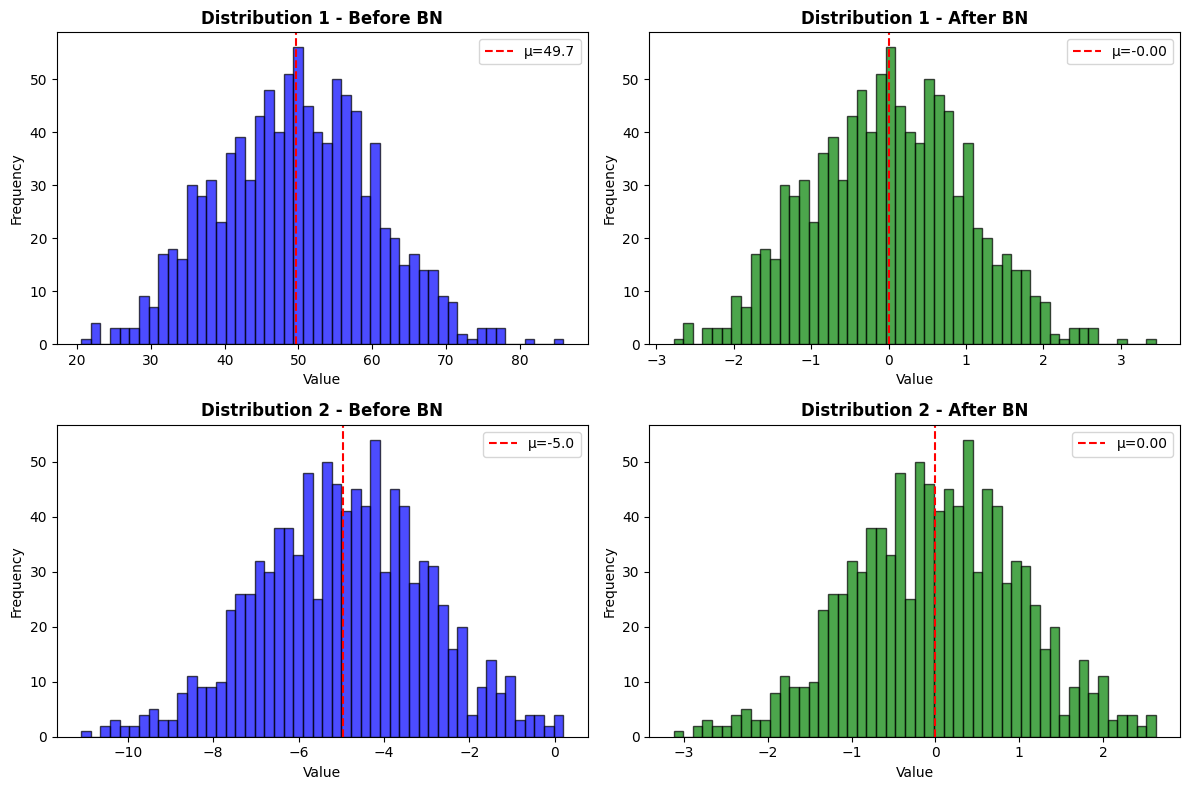

BatchNorm standardizes different distributions to similar scale


In [9]:
# Generate data with different distributions
brainstate.random.seed(0)
x1 = brainstate.random.randn(1000) * 10 + 50  # High variance, high mean
x2 = brainstate.random.randn(1000) * 2 - 5     # Low variance, negative mean

# Create batch norm (treating as batch dimension)
bn = brainstate.nn.BatchNorm0d((1,))

# Reshape to (batch, features)
x1_batch = x1[:, None]
x2_batch = x2[:, None]

# Apply normalization
with brainstate.environ.context(fit=True):
    y1 = bn(x1_batch).flatten()
    y2 = bn(x2_batch).flatten()

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Distribution 1 - before
axes[0, 0].hist(np.array(x1), bins=50, alpha=0.7, color='blue', edgecolor='black')
axes[0, 0].set_title('Distribution 1 - Before BN', fontweight='bold')
axes[0, 0].set_xlabel('Value')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(jnp.mean(x1), color='red', linestyle='--', label=f'μ={jnp.mean(x1):.1f}')
axes[0, 0].legend()

# Distribution 1 - after
axes[0, 1].hist(np.array(y1), bins=50, alpha=0.7, color='green', edgecolor='black')
axes[0, 1].set_title('Distribution 1 - After BN', fontweight='bold')
axes[0, 1].set_xlabel('Value')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].axvline(jnp.mean(y1), color='red', linestyle='--', label=f'μ={jnp.mean(y1):.2f}')
axes[0, 1].legend()

# Distribution 2 - before
axes[1, 0].hist(np.array(x2), bins=50, alpha=0.7, color='blue', edgecolor='black')
axes[1, 0].set_title('Distribution 2 - Before BN', fontweight='bold')
axes[1, 0].set_xlabel('Value')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].axvline(jnp.mean(x2), color='red', linestyle='--', label=f'μ={jnp.mean(x2):.1f}')
axes[1, 0].legend()

# Distribution 2 - after
axes[1, 1].hist(np.array(y2), bins=50, alpha=0.7, color='green', edgecolor='black')
axes[1, 1].set_title('Distribution 2 - After BN', fontweight='bold')
axes[1, 1].set_xlabel('Value')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].axvline(jnp.mean(y2), color='red', linestyle='--', label=f'μ={jnp.mean(y2):.2f}')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

print("BatchNorm standardizes different distributions to similar scale")


### Layer Normalization

In [10]:
# LayerNorm: Normalizes across features (not batch)
layer_norm = brainstate.nn.LayerNorm((10,))

print("LayerNorm:")
print(layer_norm)

# Single sample
x_single = brainstate.random.randn(10) * 5 + 10

print()
print("Before LayerNorm (single sample):")
print(f"  Values: {x_single}")
print(f"  Mean: {jnp.mean(x_single):.3f}")
print(f"  Std:  {jnp.std(x_single):.3f}")

y_single = layer_norm(x_single)

print()
print("After LayerNorm:")
print(f"  Values: {y_single}")
print(f"  Mean: {jnp.mean(y_single):.3f}")
print(f"  Std:  {jnp.std(y_single):.3f}")

print()
print("✅ LayerNorm works on single samples")
print("✅ Popular in Transformers and RNNs")
print("✅ Independent of batch size")


LayerNorm:
LayerNorm(
  in_size=(10,),
  out_size=(10,),
  feature_axes=(0,),
  reduction_axes=(-1,),
  axis_name=None,
  axis_index_groups=None,
  weight=NormalizationParamState(
    value={
      'bias': ShapedArray(float32[10]),
      'scale': ShapedArray(float32[10])
    }
  ),
  epsilon=1e-06,
  dtype=<class 'numpy.float32'>,
  use_bias=True,
  use_scale=True,
  bias_init=ZeroInit(
    unit=Unit(10.0^0)
  ),
  scale_init=Constant(
    value=1.0
  ),
  use_fast_variance=True
)

Before LayerNorm (single sample):
  Values: [ 3.0611591 13.874271  17.702465  19.20955    5.685323   5.9649186
  8.997379  13.917359   5.0701327 11.3188305]
  Mean: 10.480
  Std:  5.313

After LayerNorm:
  Values: [-1.3963605   0.6388257   1.3593478   1.6430035  -0.9024544  -0.84983045
 -0.2790769   0.64693546 -1.0182422   0.15785426]
  Mean: 0.000
  Std:  1.000

✅ LayerNorm works on single samples
✅ Popular in Transformers and RNNs
✅ Independent of batch size


### Comparing Normalization Methods

In [11]:
import pandas as pd

comparison = pd.DataFrame({
    'Method': ['BatchNorm', 'LayerNorm', 'GroupNorm', 'InstanceNorm'],
    'Normalizes Over': ['Batch + Spatial', 'Features', 'Groups', 'Spatial per channel'],
    'Best For': ['CNNs, large batches', 'RNNs, Transformers', 'Small batches', 'Style transfer'],
    'Batch Dependent': ['Yes', 'No', 'No', 'No'],
    'Typical Use': ['Vision', 'NLP', 'Vision (small batch)', 'GANs, Style'],
})

print("\n📊 Normalization Method Comparison:\n")
print(comparison.to_string(index=False))

print("\n\n🎯 Quick Guide:")
print("  • Large batch + CNN → BatchNorm")
print("  • Small batch + CNN → GroupNorm")
print("  • Sequences/RNN/Transformer → LayerNorm")
print("  • Single image inference → LayerNorm or GroupNorm")


📊 Normalization Method Comparison:

      Method     Normalizes Over            Best For Batch Dependent          Typical Use
   BatchNorm     Batch + Spatial CNNs, large batches             Yes               Vision
   LayerNorm            Features  RNNs, Transformers              No                  NLP
   GroupNorm              Groups       Small batches              No Vision (small batch)
InstanceNorm Spatial per channel      Style transfer              No          GANs, Style


🎯 Quick Guide:
  • Large batch + CNN → BatchNorm
  • Small batch + CNN → GroupNorm
  • Sequences/RNN/Transformer → LayerNorm
  • Single image inference → LayerNorm or GroupNorm


## 3. Putting It All Together

Building a complete network with activations and normalization:

In [12]:
import brainunit as u


class ModernCNN(brainstate.nn.Module):
    """CNN with modern activations and normalization."""

    def __init__(self, num_classes=10):
        super().__init__()

        # Block 1: Conv + BatchNorm + GELU
        self.conv1 = brainstate.nn.Conv2d((32, 32, 3), out_channels=64, kernel_size=(3, 3), padding='SAME')
        self.bn1 = brainstate.nn.BatchNorm2d((32, 32, 64))
        self.act1 = brainstate.nn.GELU()
        self.pool1 = brainstate.nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2))

        # Block 2
        self.conv2 = brainstate.nn.Conv2d((16, 16, 64), out_channels=128, kernel_size=(3, 3), padding='SAME')
        self.bn2 = brainstate.nn.BatchNorm2d((16, 16, 128))
        self.act2 = brainstate.nn.GELU()
        self.pool2 = brainstate.nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2), in_size=self.bn2.out_size)

        # Classifier
        self.fc1 = brainstate.nn.Linear((128 * 8 * 8,), (256,))
        self.ln = brainstate.nn.LayerNorm((256,))
        self.act3 = brainstate.nn.GELU()
        self.dropout = brainstate.nn.Dropout(prob=0.5)
        self.fc2 = brainstate.nn.Linear((256,), (num_classes,))

    def update(self, x):
        # Block 1
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.act1(x)
        x = self.pool1(x)

        # Block 2
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.act2(x)
        x = self.pool2(x)

        # Classifier
        x = u.math.flatten(x, start_axis=1)
        x = self.fc1(x)
        x = self.ln(x)
        x = self.act3(x)
        x = self.dropout(x)
        x = self.fc2(x)

        return x

# Create and test
brainstate.random.seed(0)
model = ModernCNN(num_classes=10)

# Forward pass
x = brainstate.random.randn(4, 32, 32, 3)  # 4 images
with brainstate.environ.context(fit=True) as env:
    logits = model(x)

print("Modern CNN with GELU + BatchNorm + LayerNorm:")
print(model)
print()
print("Input:", x.shape)
print("Output:", logits.shape)
print()
print("Logits:", logits[0])

Modern CNN with GELU + BatchNorm + LayerNorm:
ModernCNN(
  conv1=Conv2d(
    in_size=(32, 32, 3),
    out_size=(32, 32, 64),
    channel_first=False,
    channels_last=True,
    in_channels=3,
    out_channels=64,
    stride=(1, 1),
    kernel_size=(3, 3),
    lhs_dilation=(1, 1),
    rhs_dilation=(1, 1),
    groups=1,
    dimension_numbers=ConvDimensionNumbers(lhs_spec=(0, 3, 1, 2), rhs_spec=(3, 2, 0, 1), out_spec=(0, 3, 1, 2)),
    padding=SAME,
    kernel_shape=(3, 3, 3, 64),
    w_mask=None,
    w_initializer=XavierNormal(
      scale=1.0,
      mode='fan_avg',
      in_axis=-2,
      out_axis=-1,
      distribution='truncated_normal',
      rng=RandomState([1846506472 1430574090]),
      unit=Unit(10.0^0)
    ),
    b_initializer=None,
    weight=ParamState(
      value={
        'weight': ShapedArray(float32[3,3,3,64])
      }
    )
  ),
  bn1=BatchNorm2d(
    in_size=(32, 32, 64),
    out_size=(32, 32, 64),
    affine=True,
    bias_initializer=Constant(
      value=0.0
    ),
 

## Summary

In this tutorial, you learned:

✅ **Activation Functions**
  - ReLU family (ReLU, Leaky ReLU, ELU)
  - Modern activations (GELU, SiLU)
  - Classic activations (Sigmoid, Tanh)
  - Softmax for classification

✅ **Normalization Layers**
  - BatchNorm for large-batch training
  - LayerNorm for sequences and transformers
  - GroupNorm for small-batch scenarios

✅ **Practical Guidelines**
  - When to use each activation
  - When to use each normalization
  - How to combine them effectively

### Quick Reference Card

| Task | Activation | Normalization |
|------|-----------|---------------|
| **CNN (large batch)** | ReLU/GELU | BatchNorm |
| **CNN (small batch)** | ReLU/GELU | GroupNorm |
| **Transformer/NLP** | GELU | LayerNorm |
| **RNN/LSTM** | Tanh (gates) | LayerNorm |
| **Binary output** | Sigmoid | - |
| **Multi-class output** | Softmax | - |

### Best Practices

1. 🎯 **Use ReLU/GELU** as default activations
2. 📊 **Add normalization** after conv/linear layers
3. ⚡ **Order**: Conv/Linear → Norm → Activation
4. 🔍 **Experiment** with activation functions
5. 📝 **Use appropriate normalization** for your batch size

### Next Steps

Continue with:
- **Recurrent Networks** - Handle sequential data
- **Training** - Optimize with gradient descent
- **Advanced Architectures** - ResNets, Transformers